
A3: Unsupervised learning with SOM
Dataset: A3-data.txt

A self-organizing map (SOM) or self-organizing feature map (SOFM) is an unsupervised machine learning technique used to produce a low-dimensional (typically two-dimensional) representation of a higher dimensional data set while preserving the topological structure of the data. For example, a data set with p variables measured in n observations could be represented as clusters of observations with similar values for the variables.

These clusters then could be visualized as a two-dimensional "map" such that observations in proximal clusters have more similar values than observations in distal clusters. This can make high-dimensional data easier to visualize and analyze.

# Install in google colab SOMOCLU

In [2]:
pip install -r /content/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.6-cp310-cp310-linux_x86_64.whl size=595792 sha256=df1e5a598d80a56346f1484d93de7d7b1f7db3f777607f71961ff75d6e843238
  Stored in directory: /root/.cache/pip/wheels/59/c3/65/d78959b2e432af6e863523efe8d1faa21111c1cc7fd4e04436
Successfully built somoclu


# Import modules


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import somoclu

# load training data

In [7]:

filename = 'A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)

features = ['x', 'y', 'z', 't']
target = ['class']

# Separating  features & target

In [8]:


x = df.loc[:, features].values


y = df.loc[:, target].values

print(x)

[[-3.16755250e-02 -9.91205374e+00 -5.79436176e-01 -1.04423881e+00]
 [ 2.52598694e-03  6.17245598e+00  3.28833907e+00 -1.00642749e+00]
 [ 1.83123266e-01 -3.87840555e-01  6.23646977e+00 -1.69149115e+00]
 ...
 [-6.68528740e-01 -6.07597209e-01  6.39294699e-01  4.32921341e+00]
 [-1.22710839e-01 -5.51695654e+00 -2.11117254e+00  2.20967467e+00]
 [ 7.40207379e-01 -7.49217616e+00  1.95942618e+00 -7.11991799e+00]]


# Print planar maps
train Somoclu with default parameter settings

In [10]:
n_rows, n_columns = 200, 200
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som.train(x)

# Plot the component planes of the trained codebook of the ESOM

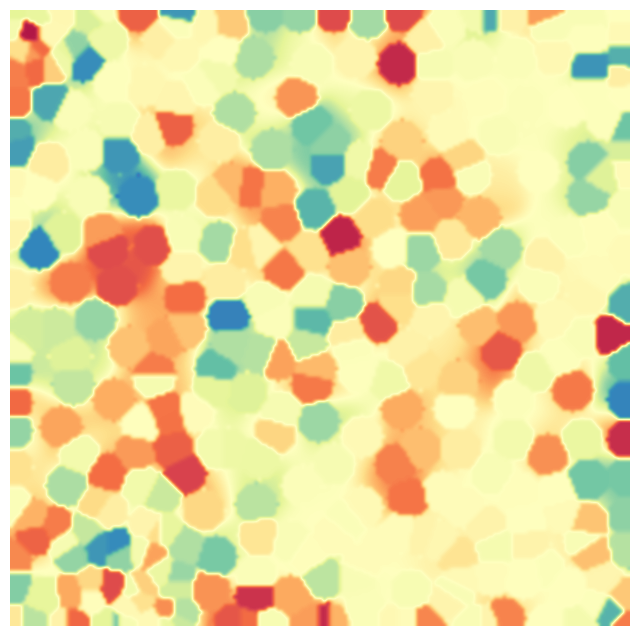

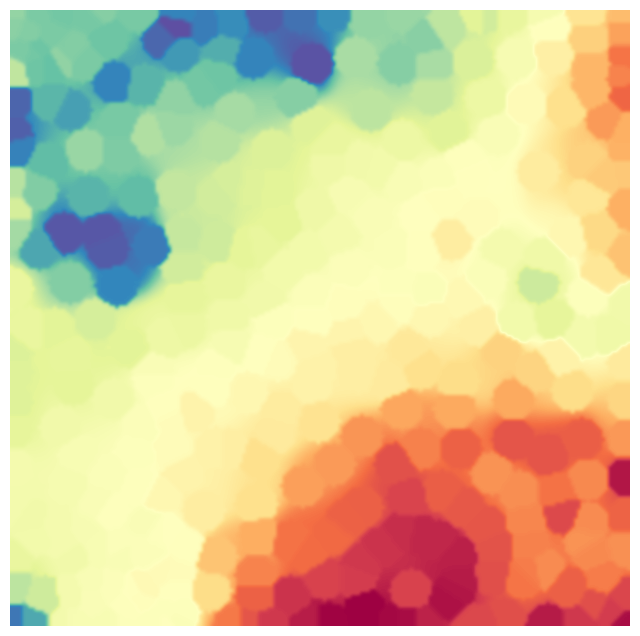

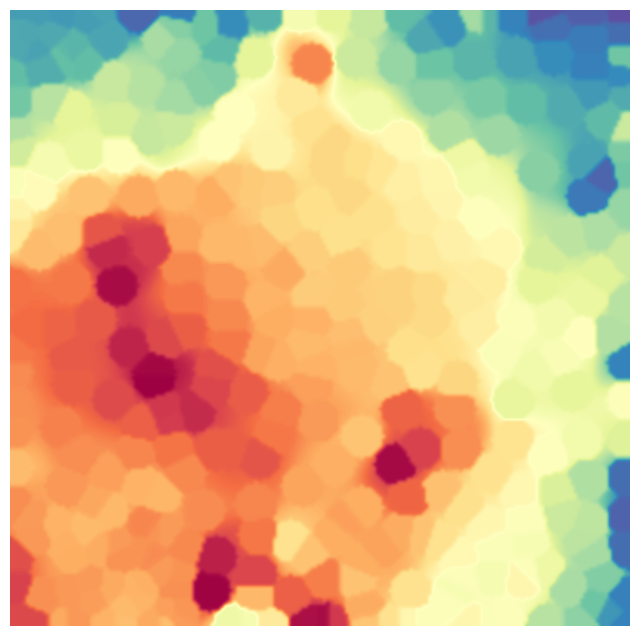

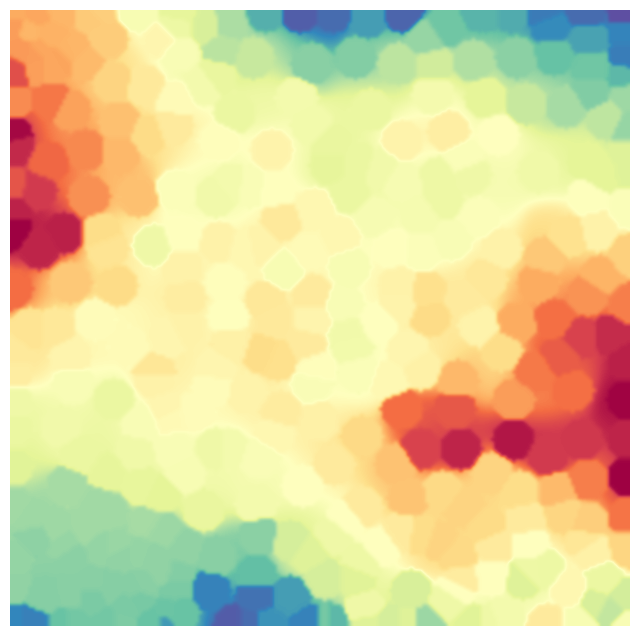

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [11]:
som.view_component_planes()

# Plot the U-Matrix

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

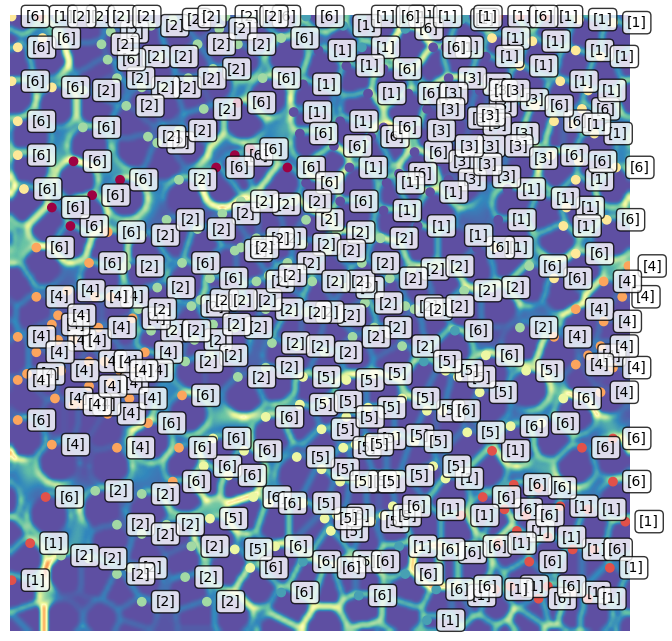

In [20]:
colors = ['red','green','blue','purple','yellow','black','cyan']
som.view_umatrix(bestmatches=True, labels=y, filename='/content/outputdat1')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

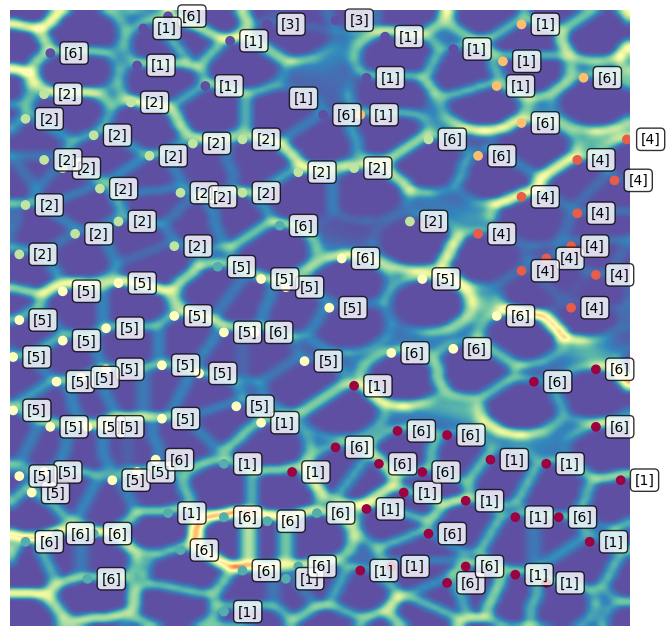

In [22]:
som.view_umatrix(bestmatches=True, filename='/content/outputdat1', labels=y,
                 zoom=((50, n_rows), (100, n_columns)))

# Toroid topology

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

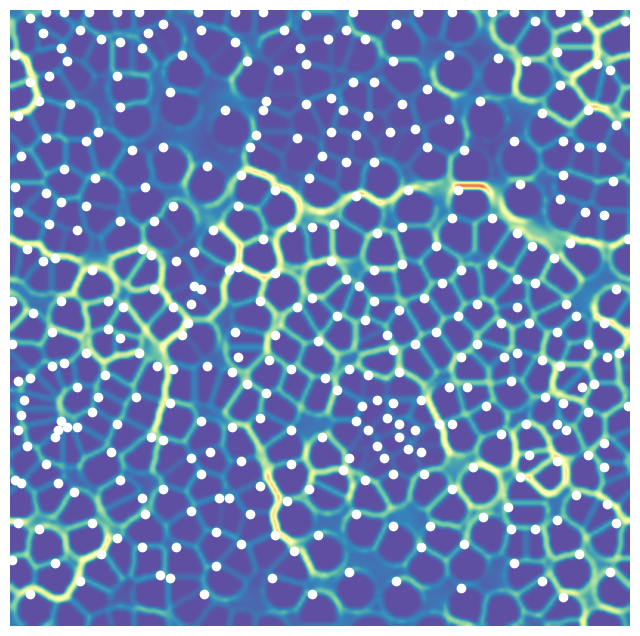

In [23]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False)
som.train(x)
som.view_umatrix(bestmatches=True, filename='/content/outputdat1')

In [16]:
# Initialization with principal component analysis and clustering the results
# Example: https://somoclu.readthedocs.io/en/stable/example.html#initialization-with-principal-component-analysis-and-clustering-the-results
print('Initialization with principal component analysis and clustering the results...')

Initialization with principal component analysis and clustering the results...


# Initialization with principal component analysis and clustering the results

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

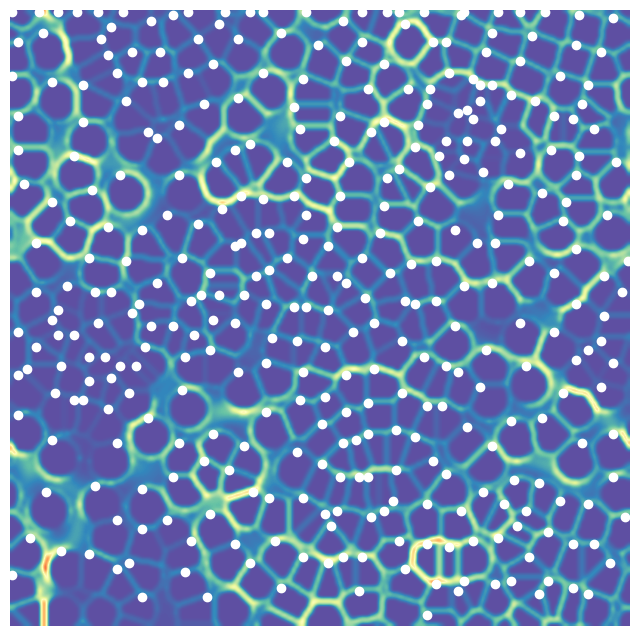

In [18]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False, initialization="pca")
som.train(x)
som.view_umatrix(bestmatches=True, filename='/content/outputdat1')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


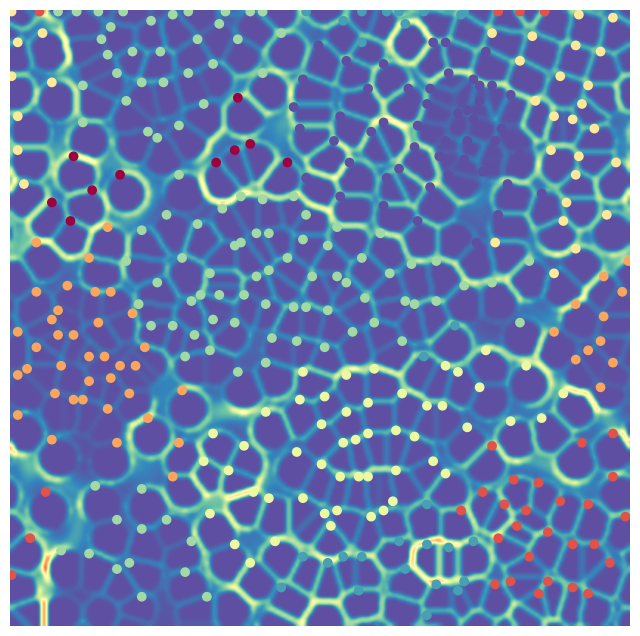

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [19]:
som.cluster()
som.view_umatrix(bestmatches=True)